In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [100]:
train_data = pd.read_csv('cars_data.csv')
train_data = train_data.drop(['Unnamed: 0'], axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32316 entries, 0 to 32315
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               32316 non-null  object 
 1   year                32316 non-null  int64  
 2   Price               32262 non-null  float64
 3   Gas Mileage         26292 non-null  float64
 4   Engine              30341 non-null  float64
 5   Drivetrain          30600 non-null  float64
 6   Passenger Capacity  32316 non-null  int64  
 7   Passenger Doors     32316 non-null  int64  
 8   Body Style          30600 non-null  float64
 9   Transmission        29602 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 2.5+ MB


In [101]:
train_data['model'] = train_data['model'].astype('category').cat.codes

In [ ]:
train_data.groupby('model').nunique()

In [119]:
train_data['model']

0         0
1         0
2         0
3         0
4         0
         ..
24393    41
24394    41
24395    41
24396    41
24397    41
Name: model, Length: 24398, dtype: int8

In [120]:
train_data.dropna(axis=0, inplace=True)
#toujours reset index
train_data=train_data.reset_index()
# train_data=train_data.drop('model', axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24398 entries, 0 to 24397
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               24398 non-null  int64  
 1   model               24398 non-null  int8   
 2   year                24398 non-null  int64  
 3   Price               24398 non-null  float64
 4   Gas Mileage         24398 non-null  float64
 5   Engine              24398 non-null  float64
 6   Drivetrain          24398 non-null  float64
 7   Passenger Capacity  24398 non-null  int64  
 8   Passenger Doors     24398 non-null  int64  
 9   Body Style          24398 non-null  float64
 10  Transmission        24398 non-null  float64
dtypes: float64(6), int64(4), int8(1)
memory usage: 1.9 MB


In [104]:
train_data=train_data.drop('index', axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24398 entries, 0 to 24397
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               24398 non-null  int8   
 1   year                24398 non-null  int64  
 2   Price               24398 non-null  float64
 3   Gas Mileage         24398 non-null  float64
 4   Engine              24398 non-null  float64
 5   Drivetrain          24398 non-null  float64
 6   Passenger Capacity  24398 non-null  int64  
 7   Passenger Doors     24398 non-null  int64  
 8   Body Style          24398 non-null  float64
 9   Transmission        24398 non-null  float64
dtypes: float64(6), int64(3), int8(1)
memory usage: 1.7 MB


In [105]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24398 entries, 0 to 24397
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               24398 non-null  int8   
 1   year                24398 non-null  int64  
 2   Price               24398 non-null  float64
 3   Gas Mileage         24398 non-null  float64
 4   Engine              24398 non-null  float64
 5   Drivetrain          24398 non-null  float64
 6   Passenger Capacity  24398 non-null  int64  
 7   Passenger Doors     24398 non-null  int64  
 8   Body Style          24398 non-null  float64
 9   Transmission        24398 non-null  float64
dtypes: float64(6), int64(3), int8(1)
memory usage: 1.7 MB


In [106]:
#Cree une copie pour travailler dans le ML (deep=True) bien garde
X = train_data.copy(deep=True)
y = train_data.Price

In [107]:
X=X.drop('Price', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24398 entries, 0 to 24397
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               24398 non-null  int8   
 1   year                24398 non-null  int64  
 2   Gas Mileage         24398 non-null  float64
 3   Engine              24398 non-null  float64
 4   Drivetrain          24398 non-null  float64
 5   Passenger Capacity  24398 non-null  int64  
 6   Passenger Doors     24398 non-null  int64  
 7   Body Style          24398 non-null  float64
 8   Transmission        24398 non-null  float64
dtypes: float64(5), int64(3), int8(1)
memory usage: 1.5 MB


In [108]:
#on tranforme y en array pour travailler avec le modele de ML
y=pd.DataFrame(y)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24398 entries, 0 to 24397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   24398 non-null  float64
dtypes: float64(1)
memory usage: 190.7 KB


In [109]:
y.tail()

,Price
24393,34300.0
24394,41200.0
24395,44850.0
24396,41000.0
24397,44650.0


In [110]:
print("Shape of input data: {} and shape of target variable: {}".format(X.shape, y.shape))

X.head() # Show first 5 training examples
X.info()

Shape of input data: (24398, 9) and shape of target variable: (24398, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24398 entries, 0 to 24397
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               24398 non-null  int8   
 1   year                24398 non-null  int64  
 2   Gas Mileage         24398 non-null  float64
 3   Engine              24398 non-null  float64
 4   Drivetrain          24398 non-null  float64
 5   Passenger Capacity  24398 non-null  int64  
 6   Passenger Doors     24398 non-null  int64  
 7   Body Style          24398 non-null  float64
 8   Transmission        24398 non-null  float64
dtypes: float64(5), int64(3), int8(1)
memory usage: 1.5 MB


In [45]:
# X=np.array(X)
# y=np.array(y)

In [50]:
# type(y)
# y

array([[40600.],
       [45500.],
       [43600.],
       ...,
       [44850.],
       [41000.],
       [44650.]])

In [ ]:
# #Reset index
# X=X.reset_index()
# X.tail()
# X.info()

In [ ]:
# y=pd.DataFrame(y)
# y.info()

In [111]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [124]:
#Train split test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [123]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
#biblioteque pour  comparer
from sklearn.metrics import r2_score
#Randomized search
from sklearn.model_selection import RandomizedSearchCV
#Gridsearch
from sklearn.model_selection import GridSearchCV



In [ ]:
# rf = RandomForestRegressor(max_depth=2, random_state=0)
# predict_price_test=rf.predict(X_test)
# predict_price_train=rf.predict(X_train)

# #values.ravel c'est utilise pour arranger l'array 
# #clf va substituer le rf dans le fit
# rf.fit(X_train, y_train.values.ravel())

# #Compare y_test(valeur reels) contre valeurs de prix predictes sur X_test
# print("R2 test :", r2_score(y_test, predict_price_test))
# #la grosse entre les R2 test et train, ça veut dire on a overfitte le modele
# print("R2 train :", r2_score(y_train, predict_price_train))


In [ ]:



#rf = RandomForestRegressor(n_estimators=1000, max_depth=10) avant randomized search
#avec des paramtres a la main

rf = RandomForestRegressor()

#paramtres pour randomized search et gridsearch
n_estimators = [int(x) for x in np.linspace(start=100, stop=200, num=10)]
print("n_estimators :", n_estimators)
max_features = [None, 'auto', 'sqrt']
max_depth = [10, 14, 18]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}
#Appel a rds (enlever les commentaires pour lancer le randomizedsearch)
# clf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, verbose=3,
# n_jobs=2, return_train_score=True, scoring="r2")

#Gridsearch, faut utiliser le randomized plutot
clf = GridSearchCV(estimator=rf, param_grid=param_grid, verbose=3,
n_jobs=2, return_train_score=True, scoring="r2")

#values.ravel c'est utilise pour arranger l'array 
#clf va substituer le rf dans le fit
clf.fit(X_train, y_train.values.ravel())

#Meilleures parametres/config
print("Best params :", clf.best_params_)

#C'est recuperer le meilleur algorithme trouve par randomized search
model = clf.best_estimator_

model.fit(X_train, y_train.values.ravel())


predict_price_test=clf.predict(X_test)
predict_price_train=clf.predict(X_train)

#Compare y_test(valeur reels) contre valeurs de prix predictes sur X_test
print("R2 test :", r2_score(y_test, predict_price_test))
#la grosse entre les R2 test et train, ça veut dire on a overfitte le modele
print("R2 train :", r2_score(y_train, predict_price_train))


In [82]:
print("Best params :", clf.best_params_)

# n_estimators : [100, 111, 122, 133, 144, 155, 166, 177, 188, 200]
# Fitting 5 folds for each of 10 candidates, totalling 50 fits
# Best params : {'n_estimators': 155, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 14, 'bootstrap': False}
# R2 test : 0.807634935047694
# R2 train : 0.9137215657183537



Best params : {'n_estimators': 188, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 18, 'bootstrap': True}


In [114]:

# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

#rf = RandomForestRegressor(n_estimators=1000, max_depth=10) avant randomized search
#avec des paramtres a la main

rf = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start=100, stop=200, num=10)]
print("n_estimators :", n_estimators)
max_features = [None, 'auto', 'sqrt']
max_depth = [10, 14, 18]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}
#Appel a rds (enlever les commentaires pour lancer le randomizedsearch)
clf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, verbose=3,
n_jobs=2, return_train_score=True, scoring="r2", cv=kf)

# #Gridsearch, faut utiliser le randomized plutot
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, verbose=3,
# n_jobs=2, return_train_score=True, scoring="r2")

#values.ravel c'est utilise pour arranger l'array 
#clf va substituer le rf dans le fit
clf.fit(X_train, y_train.values.ravel())

#Meilleures parametres/config
print("Best params :", clf.best_params_)

#C'est recuperer le meilleur algorithme trouve par randomized search
model = clf.best_estimator_

model.fit(X_train, y_train.values.ravel())


predict_price_test=clf.predict(X_test)
predict_price_train=clf.predict(X_train)

#Compare y_test(valeur reels) contre valeurs de prix predictes sur X_test
print("R2 test :", r2_score(y_test, predict_price_test))
#la grosse entre les R2 test et train, ça veut dire on a overfitte le modele
print("R2 train :", r2_score(y_train, predict_price_train))

#lie au kfold
score = cross_val_score(model, X_train, y_train.values.ravel(), cv=kf, scoring="r2")
print("\nKfold score mean :", score.mean() * 100.0)
print("Kfold std deviation :", score.std() * 100.0)
print("Kfold accuracy for each kfold :", score)
print("Kfold variance :", score.var())

n_estimators : [100, 111, 122, 133, 144, 155, 166, 177, 188, 200]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params : {'n_estimators': 166, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 18, 'bootstrap': False}
R2 test : 0.9445867049395209
R2 train : 0.985229603917897

Kfold score mean : 93.50155221687093
Kfold std deviation : 0.7410390079406897
Kfold accuracy for each kfold : [0.94391482 0.92442453 0.92913679 0.94196203 0.93563944]
Kfold variance : 5.491388112897214e-05


Text(0.5, 0, 'Relative Importance')

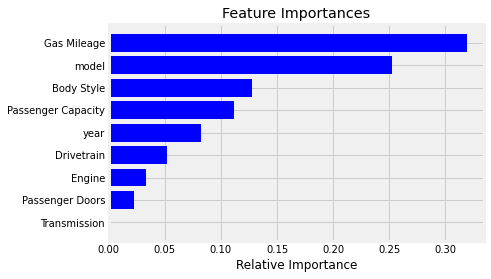

In [115]:
liste_variables=list(X.columns)
importances = model.feature_importances_ #infos donnes par randomforest
indices = np.argsort(importances)
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')